In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
jobs_data = pd.read_csv('../Scraped_Data/US_jobs_per_city_2020-08-07.csv', encoding='UTF-8')

In [3]:
jobs_data.head(5)

,Expected_jobs,Actual_jobs,City,State
0,47041,1424,New York,New York
1,87813,1443,Los Angeles,California
2,53490,1419,Chicago,Illinois
3,46346,1356,Houston,Texas
4,45872,1435,Phoenix,Arizona


In [4]:
jobs_data.describe()

,Expected_jobs,Actual_jobs
count,316.000000,316.000000
mean,23793.382911,810.351266
std,21633.037920,482.302691
min,976.000000,1.000000
25%,6246.000000,436.750000
50%,18288.500000,989.500000
75%,35498.750000,1231.250000
max,93256.000000,1467.000000


In [5]:
jobs_data.dtypes

Expected_jobs     int64
Actual_jobs       int64
City             object
State            object
dtype: object

## Analysing First digits of Expected Jobs vs Actual Jobs

In [6]:
jobs_data['Expected_jobs_first'] = jobs_data['Expected_jobs'].astype(str).str[0]
jobs_data['Actual_jobs_first'] = jobs_data['Actual_jobs'].astype(str).str[0]

In [7]:
jobs_data.dtypes

Expected_jobs           int64
Actual_jobs             int64
City                   object
State                  object
Expected_jobs_first    object
Actual_jobs_first      object
dtype: object

In [8]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
0,47041,1424,New York,New York,4,1
1,87813,1443,Los Angeles,California,8,1
2,53490,1419,Chicago,Illinois,5,1
3,46346,1356,Houston,Texas,4,1
4,45872,1435,Phoenix,Arizona,4,1


In [11]:
jobs_data.describe(include="all")

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first
count,316.000000,316.000000,316,316,316,316
unique,NaN,NaN,305,47,9,9
top,NaN,NaN,Springfield,California,3,1
freq,NaN,NaN,3,75,66,166
mean,23793.382911,810.351266,NaN,NaN,NaN,NaN
std,21633.037920,482.302691,NaN,NaN,NaN,NaN
min,976.000000,1.000000,NaN,NaN,NaN,NaN
25%,6246.000000,436.750000,NaN,NaN,NaN,NaN
50%,18288.500000,989.500000,NaN,NaN,NaN,NaN
75%,35498.750000,1231.250000,NaN,NaN,NaN,NaN


### Seprating first digit data

In [12]:
first_digit_data = jobs_data[['Expected_jobs_first','Actual_jobs_first']]

In [13]:
first_digit_data.head()

,Expected_jobs_first,Actual_jobs_first
0,4,1
1,8,1
2,5,1
3,4,1
4,4,1


In [14]:
Expected_first = first_digit_data.Expected_jobs_first.value_counts()
print(Expected_first[Expected_first>1])

3    66
1    64
2    62
4    41
6    22
5    20
7    18
8    18
9     5
Name: Expected_jobs_first, dtype: int64


In [15]:
Actual_first = first_digit_data.Actual_jobs_first.value_counts()
print(Expected_first[Actual_first>1])

3    66
1    64
2    62
4    41
6    22
5    20
7    18
8    18
9     5
Name: Expected_jobs_first, dtype: int64


### Expected Jobs

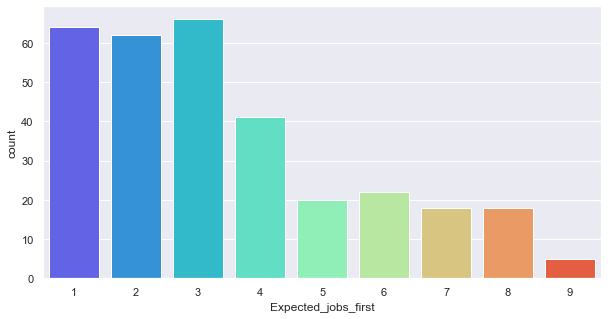

In [16]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.countplot(x='Expected_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

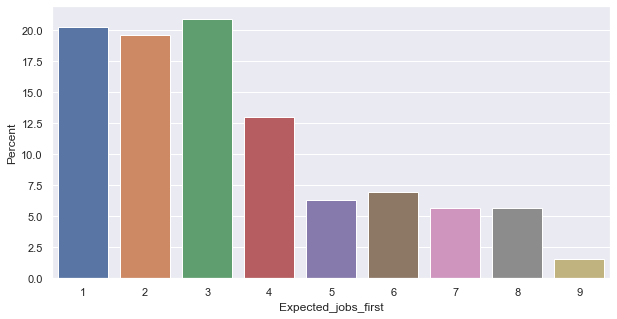

In [18]:
ax = sns.barplot(x="Expected_jobs_first", y="Expected_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Expected_jobs_first: len(Expected_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Actual jobs

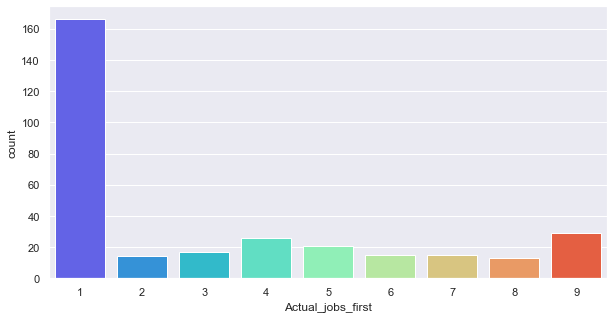

In [19]:
sns.countplot(x='Actual_jobs_first',data=first_digit_data,palette='rainbow')

[Text(0, 0.5, 'Percent')]

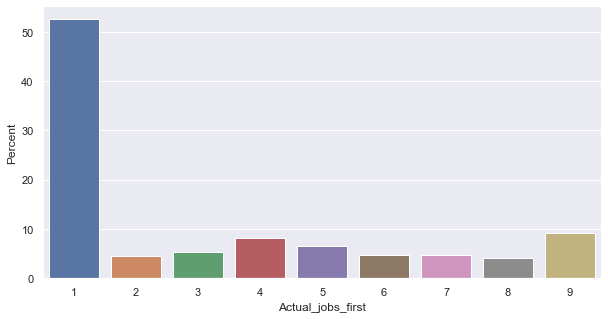

In [20]:
ax = sns.barplot(x="Actual_jobs_first", y="Actual_jobs_first", 
                 data=first_digit_data, 
                 estimator=lambda Actual_jobs_first: len(Actual_jobs_first) / len(first_digit_data) * 100)
ax.set(ylabel="Percent")

### Difference in Expected vs Actual jobs

In [21]:
jobs_data['diff'] = jobs_data['Expected_jobs'] - jobs_data['Actual_jobs']

In [22]:
jobs_data['diff_first'] = jobs_data['diff'].astype(str).str[0]

In [23]:
jobs_data.head()

,Expected_jobs,Actual_jobs,City,State,Expected_jobs_first,Actual_jobs_first,diff,diff_first
0,47041,1424,New York,New York,4,1,45617,4
1,87813,1443,Los Angeles,California,8,1,86370,8
2,53490,1419,Chicago,Illinois,5,1,52071,5
3,46346,1356,Houston,Texas,4,1,44990,4
4,45872,1435,Phoenix,Arizona,4,1,44437,4


[Text(0, 0.5, 'Percent')]

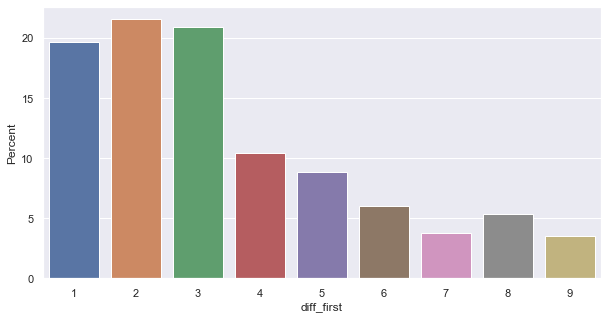

In [24]:
ax = sns.barplot(x="diff_first", y="diff_first", 
                 data=jobs_data, 
                 estimator=lambda diff_first: len(diff_first) / len(jobs_data) * 100)
ax.set(ylabel="Percent")